# Курс "Прикладные задачи анализа данных"
## Задание № 2 : визуализация датасета, выполнил Сюй Минчуань
### Датасет взят из https://www.kaggle.com/docstein/brics-world-bank-indicators
### Название датасета: BRICS World Bank Indicators

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
economy = pd.read_csv('data/Economy_Data.csv', delimiter = ";")
economy.sort_values(by="Year").head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1160,"Net financial flows, IBRD (NFL, current US$)",DT.NFL.MIBR.CD,Brazil,BRA,1970.0,4.691400e+07
1159,"Net financial flows, bilateral (NFL, current US$)",DT.NFL.BLAT.CD,South Africa,ZAF,1970.0,NaN
1158,"Net financial flows, bilateral (NFL, current US$)",DT.NFL.BLAT.CD,Russian Federation,RUS,1970.0,NaN
1157,"Net financial flows, bilateral (NFL, current US$)",DT.NFL.BLAT.CD,India,IND,1970.0,1.265952e+09


In [3]:
# eco = economy.groupby(by = 'SeriesName')
# name_list = list(eco.groups.keys())
# name_list

In [4]:
attributes = [
    'GDP (current US$)','GDP growth (annual %)','GDP per capita (current US$)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)',
    'Imports of goods and services (current US$)','Exports of goods and services (current US$)',
]

In [5]:
#economy_data = economy_data.dropna(subset=['Value'])
economy_data = economy[economy['SeriesName'].isin(attributes)]
#economy_data.dropna()
economy_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
140,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Brazil,BRA,1970.0,10.373620
141,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,China,CHN,1970.0,34.798438
142,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,India,IND,1970.0,39.927806
143,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Russian Federation,RUS,1970.0,NaN
144,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,South Africa,ZAF,1970.0,6.757373


In [6]:
economy_data.shape

(2000, 6)

In [7]:
economy_data.isna().sum()

SeriesName       0
SeriesCode       0
CountryName      0
CountryCode      0
Year             0
Value          151
dtype: int64

In [8]:
# if not tell which level to unstack, default: the very right index column 
# economy_data.fillna(method = 'ffill') # fill with previous values
economy_data = economy_data.set_index(['Year','SeriesName','CountryName'])['Value'].unstack().unstack()
economy_data.sort_values(by ='Year',inplace = True, ascending = False)
economy_data.head()

CountryName                                                     Brazil  \
SeriesName  Agriculture, forestry, and fishing, value added (% of GDP)   
Year                                                                     
2019.0                                                4.436545           
2018.0                                                4.418538           
2017.0                                                4.602101           
2016.0                                                4.891354           
2015.0                                                4.319133           

CountryName                                                                \
SeriesName  Exports of goods and services (current US$) GDP (current US$)   
Year                                                                        
2019.0                                     2.634979e+11      1.839758e+12   
2018.0                                     2.807427e+11      1.885483e+12   
2017.0                                     2.583299e+11      2.062831e+12   
2016.0                                     2.238642e+11      1.795700e+12   
2015.0                                     2.324891e+11      1.802214e+12   

CountryName                                                     \
SeriesName  GDP growth (annual %) GDP per capita (current US$)   
Year                                                             
2019.0                   1.136586                  8717.186278   
2018.0                   1.317224                  9001.234249   
2017.0                   1.322869                  9925.386238   
2016.0                  -3.275917                  8710.096690   
2015.0                  -3.545763                  8814.000987   

CountryName                                              \
SeriesName  Imports of goods and services (current US$)   
Year                                                      
2019.0                                     2.696019e+11   
2018.0                                     2.735474e+11   
2017.0                                     2.435097e+11   
2016.0                                     2.166875e+11   
2015.0                                     2.532733e+11   

CountryName                                                            \
SeriesName  Industry (including construction), value added (% of GDP)   
Year                                                                    
2019.0                                               17.922226          
2018.0                                               18.129145          
2017.0                                               18.181270          
2016.0                                               18.346592          
2015.0                                               19.360044          

CountryName                                   \
SeriesName  Services, value added (% of GDP)   
Year                                           
2019.0                             63.252920   
2018.0                             63.014075   
2017.0                             63.339844   
2016.0                             63.203696   
2015.0                             62.307867   

CountryName                                                      China  \
SeriesName  Agriculture, forestry, and fishing, value added (% of GDP)   
Year                                                                     
2019.0                                                7.111634           
2018.0                                                7.043025           
2017.0                                                7.463560           
2016.0                                                8.057288           
2015.0                                                8.387009           

CountryName                                              ...  \
SeriesName  Exports of goods and services (current US$)  ...   
Year                                                     ...   
2019.0                           

In [9]:
print(type(economy_data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
economy_data_gdp = economy_data.stack().reset_index()
economy_data_gdp

CountryName,Year,SeriesName,Brazil,China,India,Russian Federation,South Africa
0,2019.0,"Agriculture, forestry, and fishing, value adde...",4.436545e+00,7.111634e+00,1.596460e+01,3.448292e+00,1.884542e+00
1,2019.0,Exports of goods and services (current US$),2.634979e+11,2.641273e+12,5.365582e+11,4.812868e+11,1.049158e+11
2,2019.0,GDP (current US$),1.839758e+12,1.434290e+13,2.875142e+12,1.699877e+12,3.514316e+11
3,2019.0,GDP growth (annual %),1.136586e+00,6.108561e+00,5.023873e+00,1.341875e+00,1.525833e-01
4,2019.0,GDP per capita (current US$),8.717186e+03,1.026168e+04,2.104146e+03,1.158500e+04,6.001401e+03
...,...,...,...,...,...,...,...
395,1970.0,GDP growth (annual %),8.769947e+00,1.930000e+01,5.157230e+00,NaN,5.248674e+00
396,1970.0,GDP per capita (current US$),4.450231e+02,1.131630e+02,1.124345e+02,NaN,8.345528e+02
397,1970.0,Imports of goods and services (current US$),3.153304e+09,2.278820e+09,2.421333e+09,NaN,4.537398e+09
398,1970.0,"Industry (including construction), value added...",3.218369e+01,4.027284e+01,2.172931e+01,NaN,3.614320e+01


## GDP

In [11]:
gdp_value = economy_data_gdp[economy_data_gdp['SeriesName'] == 'GDP (current US$)'].sort_values(by='Year')
gdp_value.head()

CountryName,Year,SeriesName,Brazil,China,India,Russian Federation,South Africa
394,1970.0,GDP (current US$),4.232760e+10,9.260297e+10,6.242248e+10,NaN,1.841839e+10
386,1971.0,GDP (current US$),4.920446e+10,9.980096e+10,6.735099e+10,NaN,2.033369e+10
378,1972.0,GDP (current US$),5.853901e+10,1.136876e+11,7.146319e+10,NaN,2.135744e+10
370,1973.0,GDP (current US$),7.927906e+10,1.385443e+11,8.551527e+10,NaN,2.929567e+10
362,1974.0,GDP (current US$),1.051360e+11,1.441821e+11,9.952590e+10,NaN,3.680772e+10


<Figure size 1440x720 with 0 Axes>

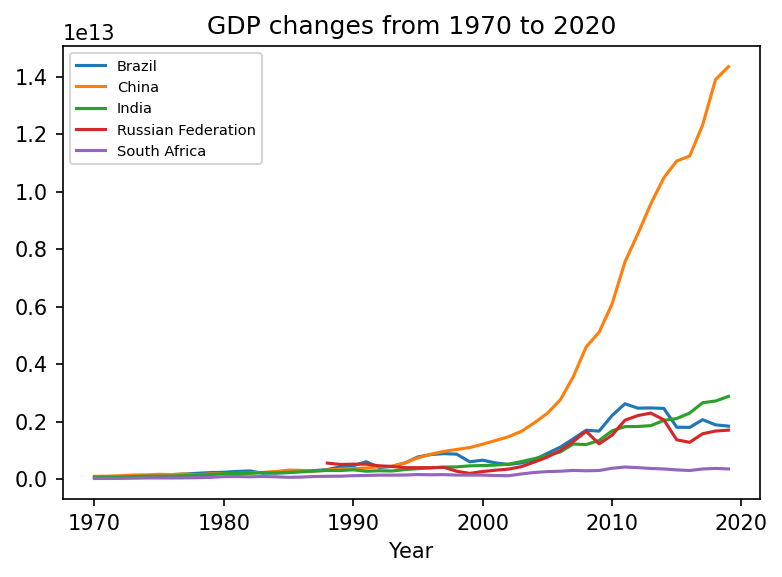

In [12]:
plt.figure(figsize=(20,10))
plt.rcParams['figure.dpi'] = 150
gdp_value.plot(x = "Year", kind = "line") # to draw mutliple cols of data
plt.title("GDP changes from 1970 to 2020")
plt.legend(fontsize = 7)

<Figure size 3000x750 with 0 Axes>

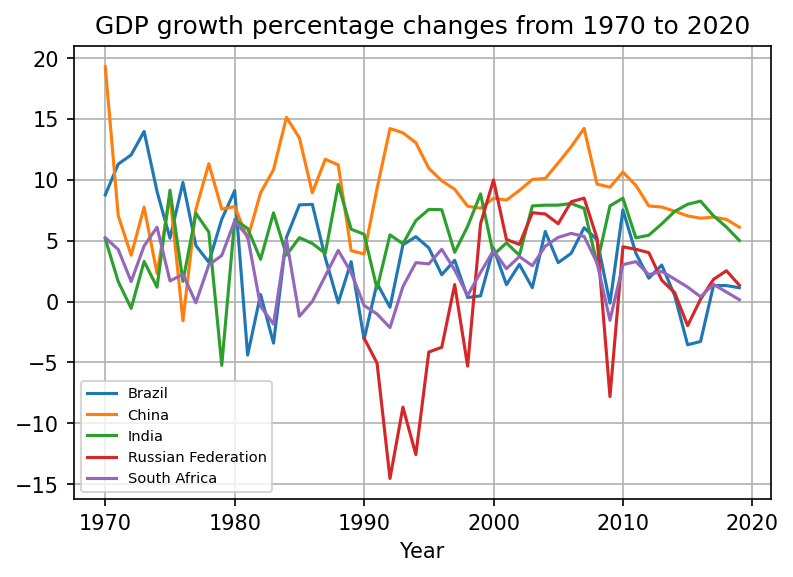

In [13]:
gdp_value = economy_data_gdp[economy_data_gdp['SeriesName'] == 'GDP growth (annual %)'].sort_values(by='Year')
plt.figure(figsize=(20,5))
plt.rcParams['figure.dpi'] = 150
gdp_value.plot(x = "Year", kind = "line") # to draw mutliple cols of data
plt.title("GDP growth percentage changes from 1970 to 2020")
plt.legend(fontsize = 7)
plt.grid()

<Figure size 3000x750 with 0 Axes>

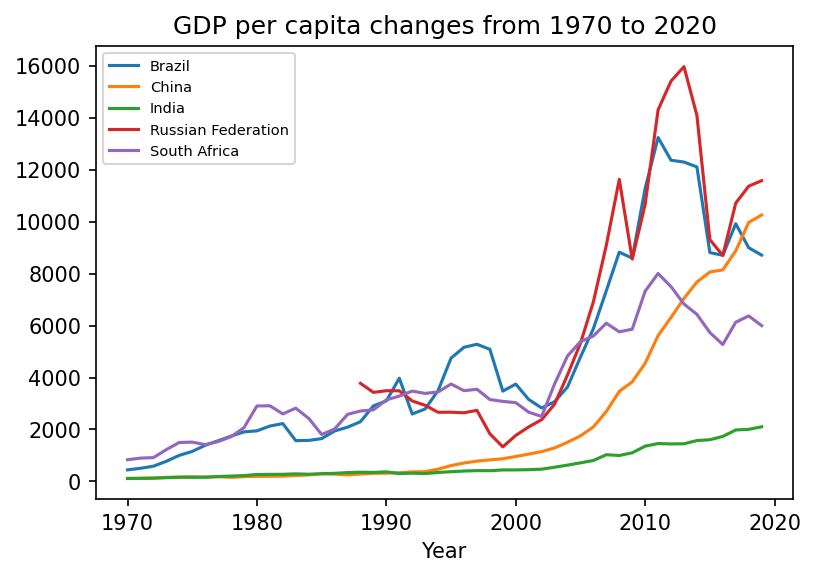

In [14]:
gdp_value = economy_data_gdp[economy_data_gdp['SeriesName'] == 'GDP per capita (current US$)'].sort_values(by='Year')
plt.figure(figsize=(20,5))
plt.rcParams['figure.dpi'] = 150
gdp_value.plot(x = "Year", kind = "line") # to draw mutliple cols of data
plt.title("GDP per capita changes from 1970 to 2020")
plt.legend(fontsize = 7)

## First, second, third industry percentage

In [15]:
industries_per = economy_data.stack().reset_index()
industries_per = industries_per[industries_per['SeriesName'].isin(list(
    ['Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)',
    ]))]
industries_per.loc[: ,'Year'] = pd.to_datetime(industries_per['Year'],format = '%Y').dt.year
industries_per.fillna(method='ffill',inplace=True)
industries_per.sort_values(by='Year').head()

CountryName,Year,SeriesName,Brazil,China,India,Russian Federation,South Africa
399,1970,"Services, value added (% of GDP)",41.471836,24.928719,35.046871,30.593368,51.238978
398,1970,"Industry (including construction), value added...",32.183694,40.272843,21.729309,30.593368,36.143205
392,1970,"Agriculture, forestry, and fishing, value adde...",10.373620,34.798438,39.927806,30.593368,6.757373
384,1971,"Agriculture, forestry, and fishing, value adde...",11.014181,33.631812,38.099779,30.593368,7.336863
391,1971,"Services, value added (% of GDP)",41.915429,24.445439,35.803649,30.593368,52.155676


In [16]:
from matplotlib import ticker
sns.set_style("darkgrid")

In [17]:
def plot_func(ax,fontsize, country):  
    sns.barplot(x="Year",y=country,data=industries_per,hue = "SeriesName",ci=False, ax=ax)
    #ax.bar(x=industries_per["Year"],y=country,label='Agriculture')
    xlabels = ax.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(-60)    
    formatter = ticker.FormatStrFormatter("%d")
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel('Year',fontsize = fontsize)
    ax.set_ylabel(country,fontsize = fontsize)
    ax.set_title(country+"'s industries distribution",fontsize = fontsize)


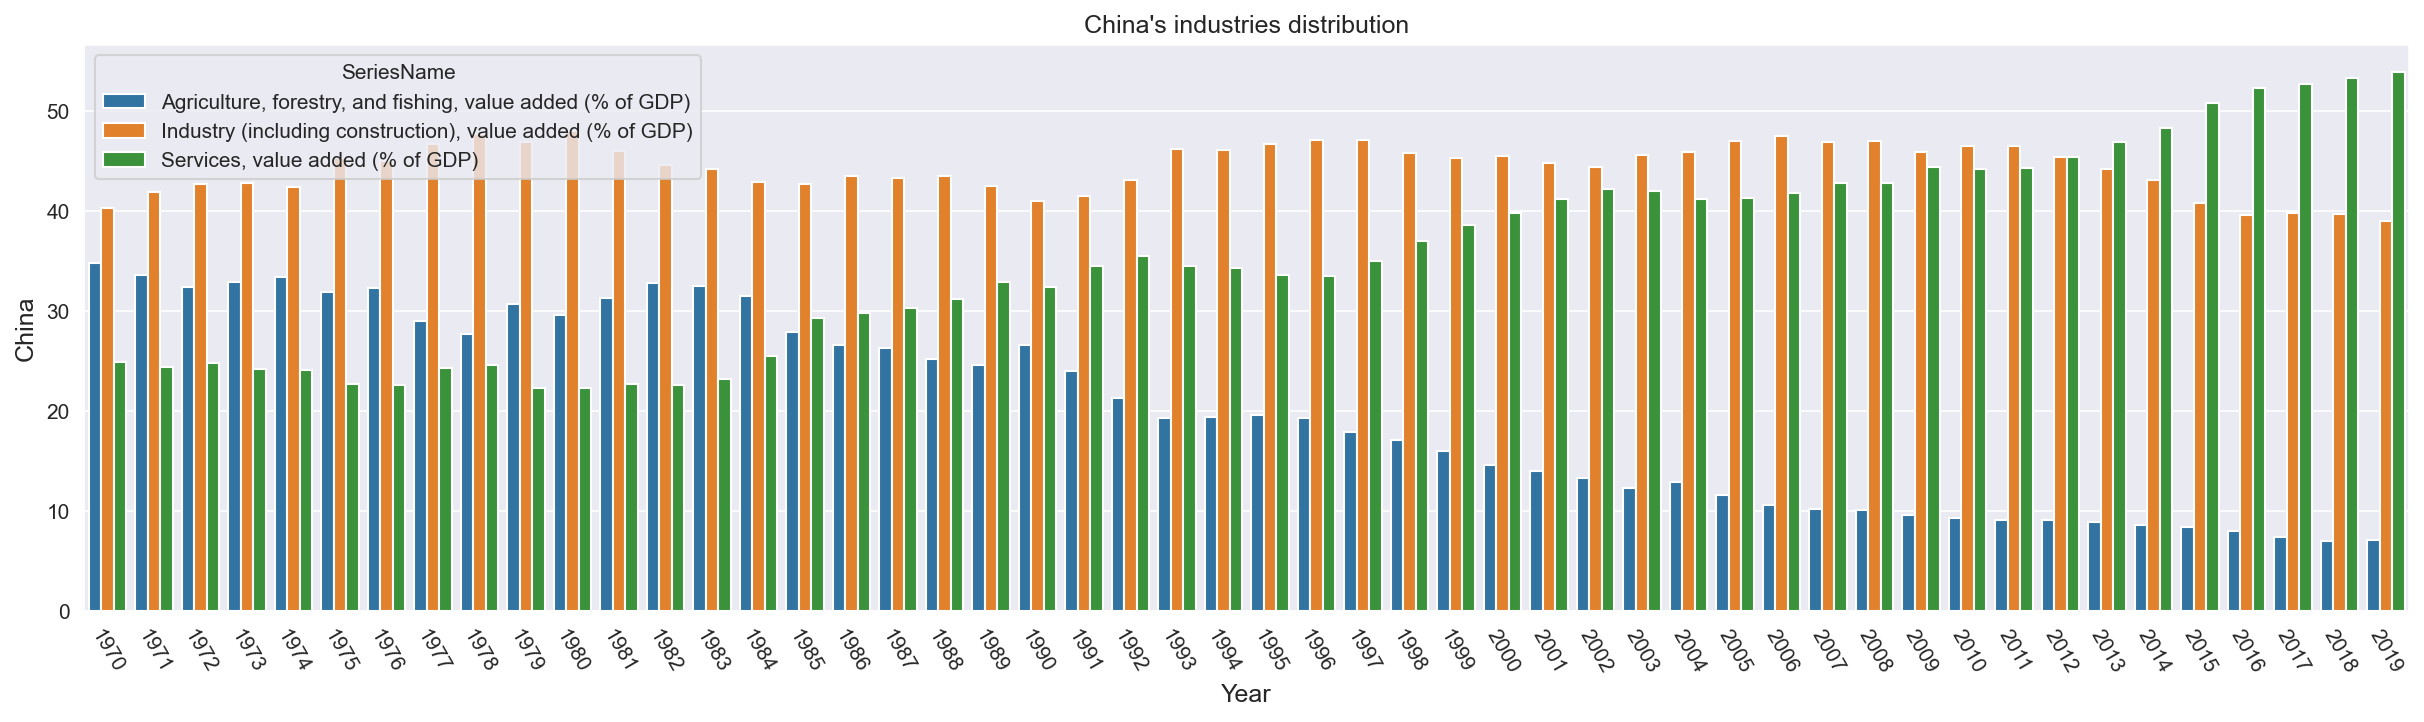

In [18]:
fig, ax1 = plt.subplots(1,1,figsize = (20,5))
plot_func(ax1,12,"China")

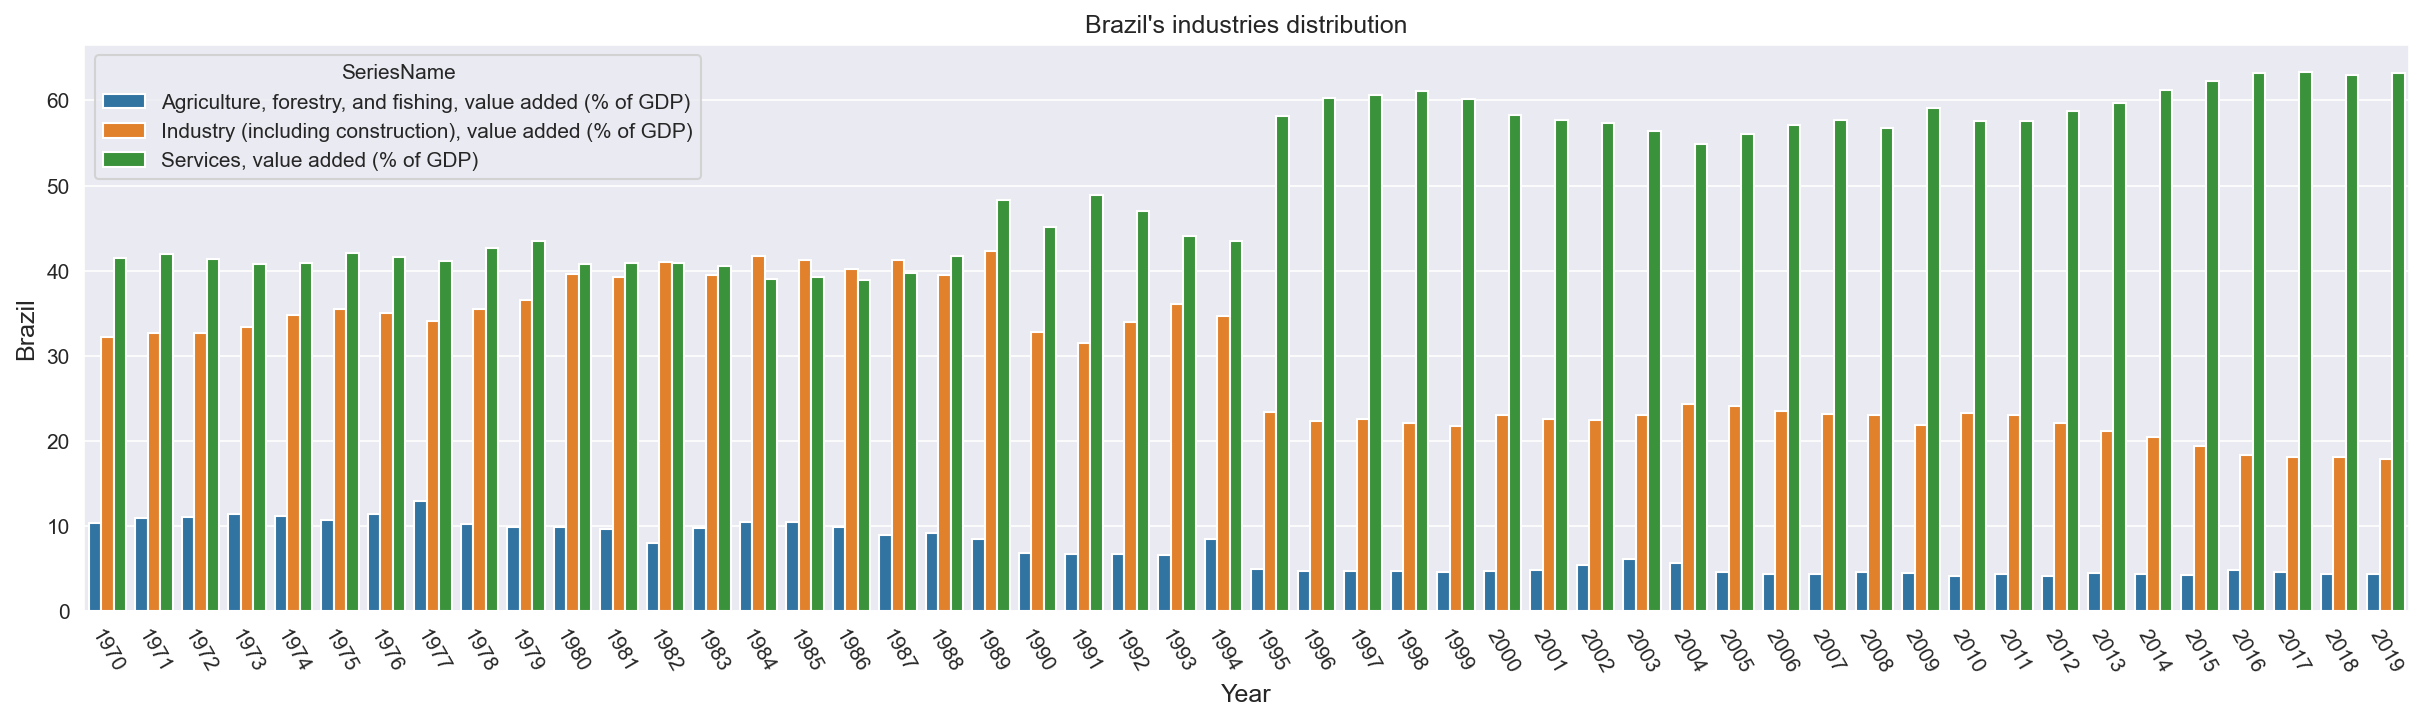

In [19]:
fig , ax2 = plt.subplots(1,1,figsize = (20,5))   
plot_func(ax2,12,"Brazil")

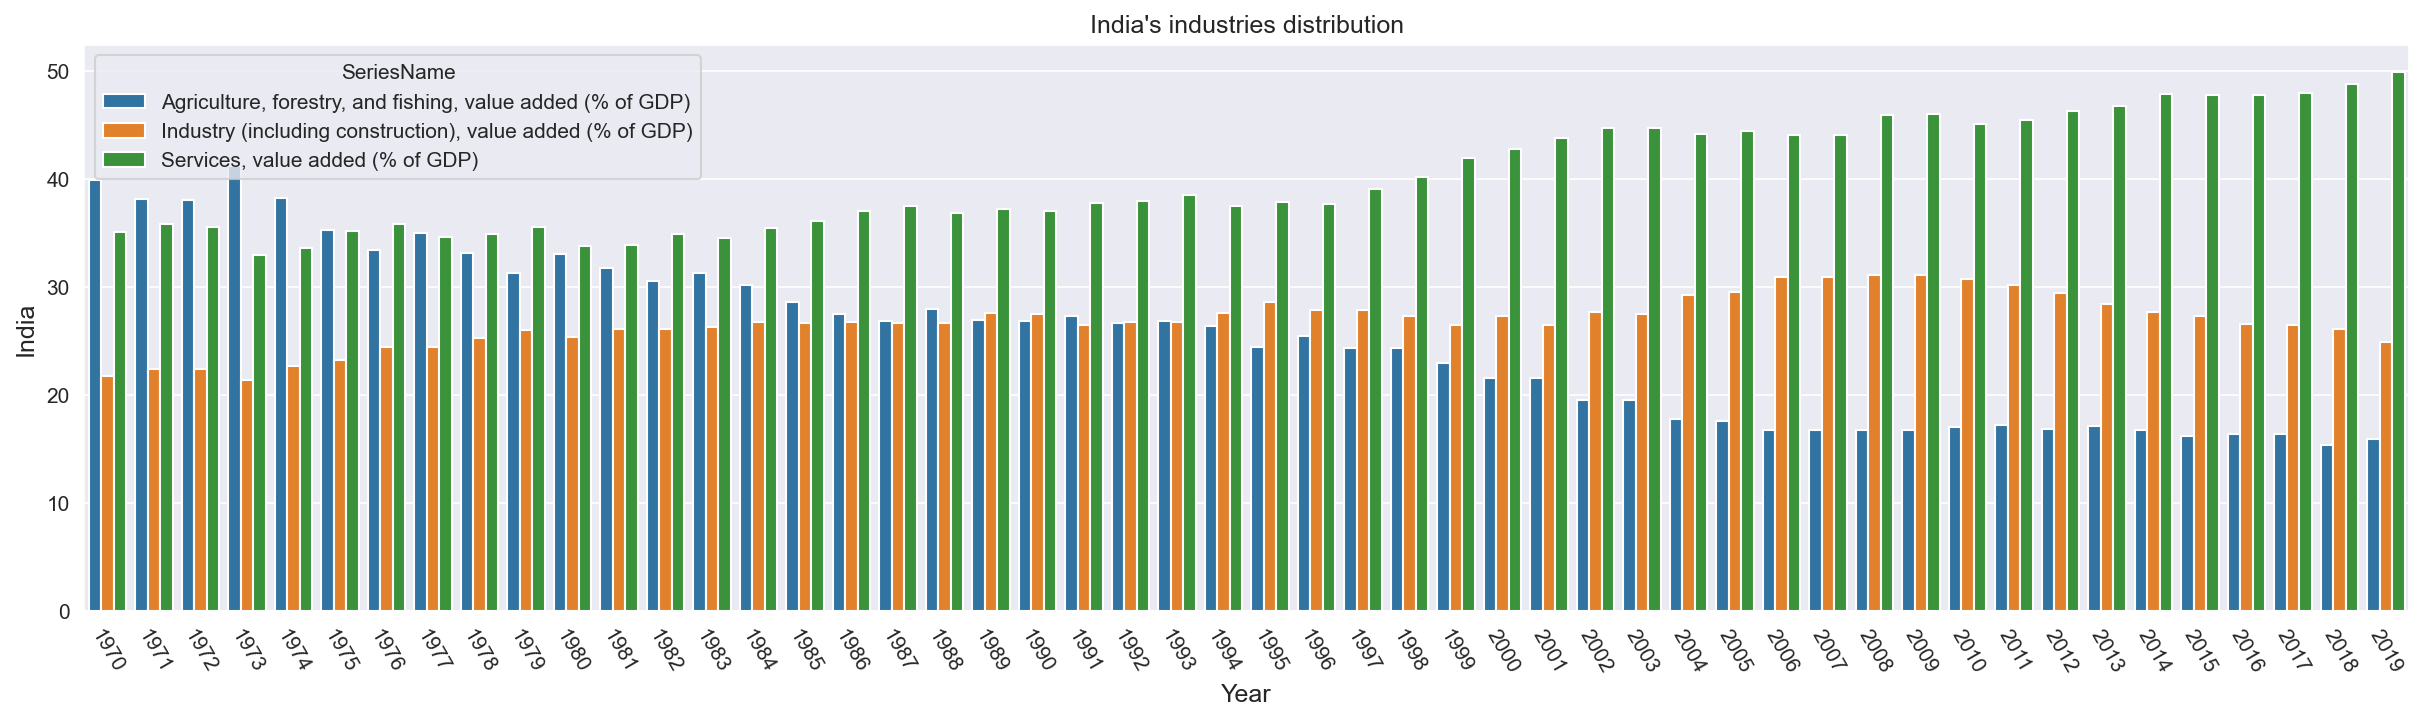

In [20]:
fig , ax3 = plt.subplots(1,1,figsize = (20,5)) 
plot_func(ax3,12,"India")

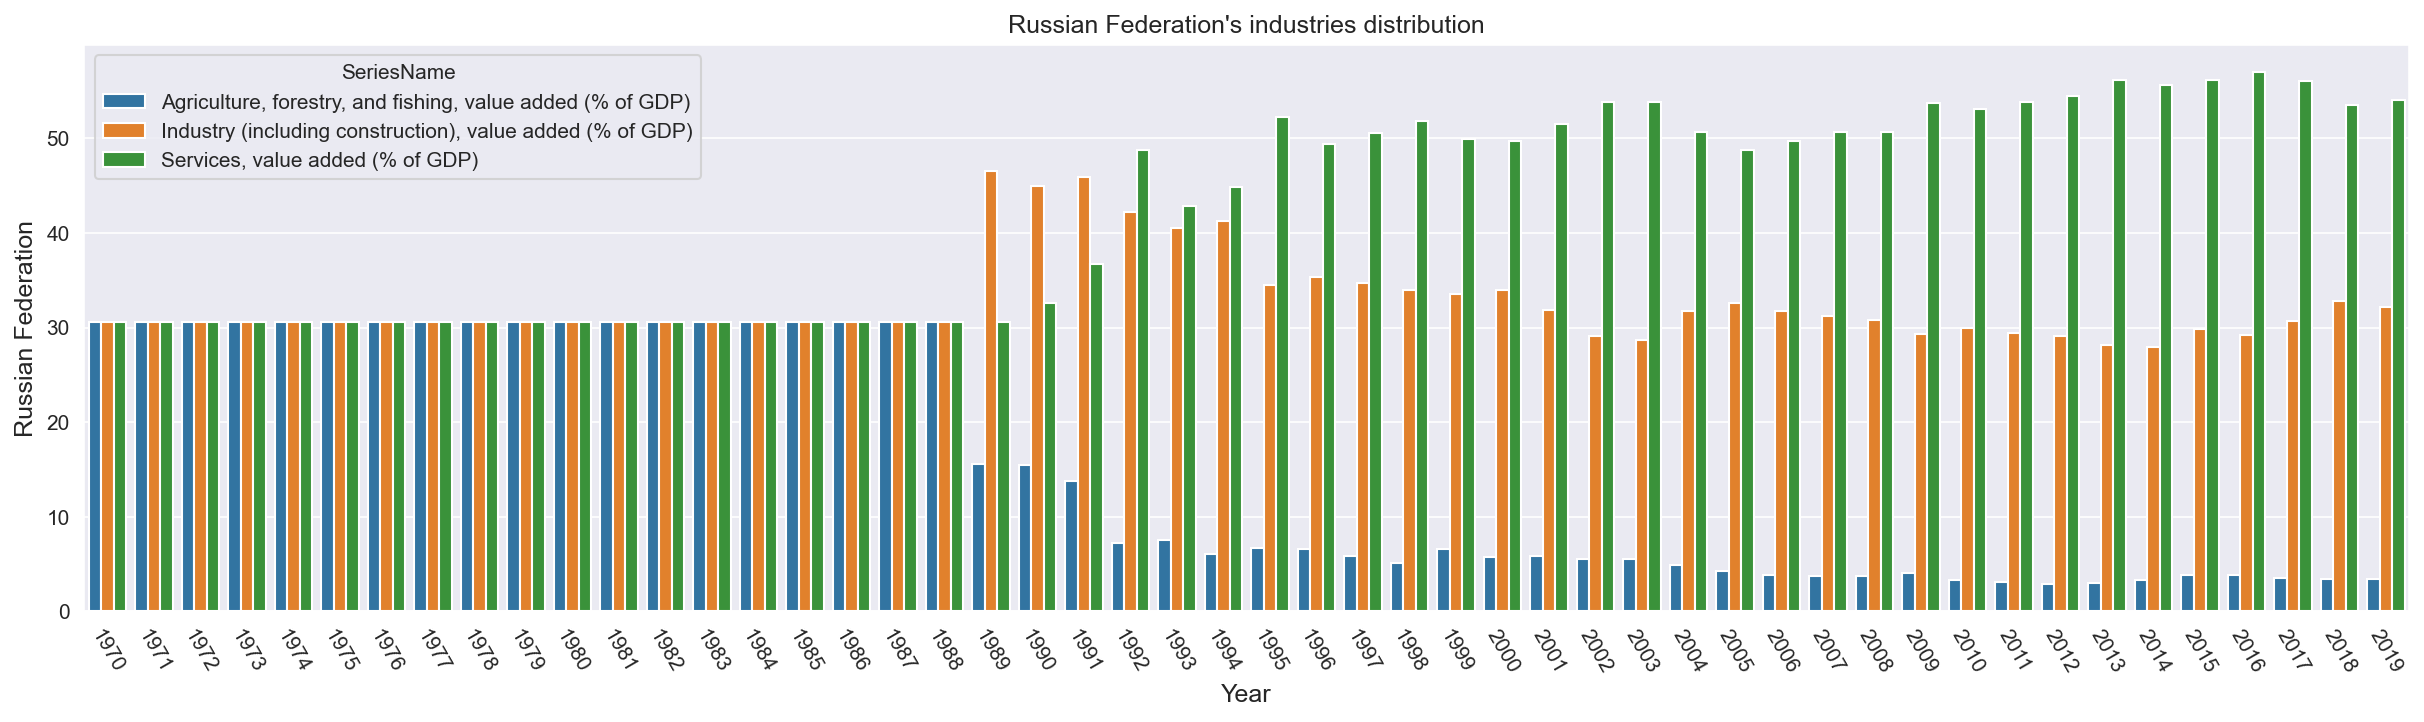

In [21]:
fig , ax4 = plt.subplots(1,1,figsize = (20,5)) 
#ax4.set_xlim(1989,2019)
plot_func(ax4,12,"Russian Federation")

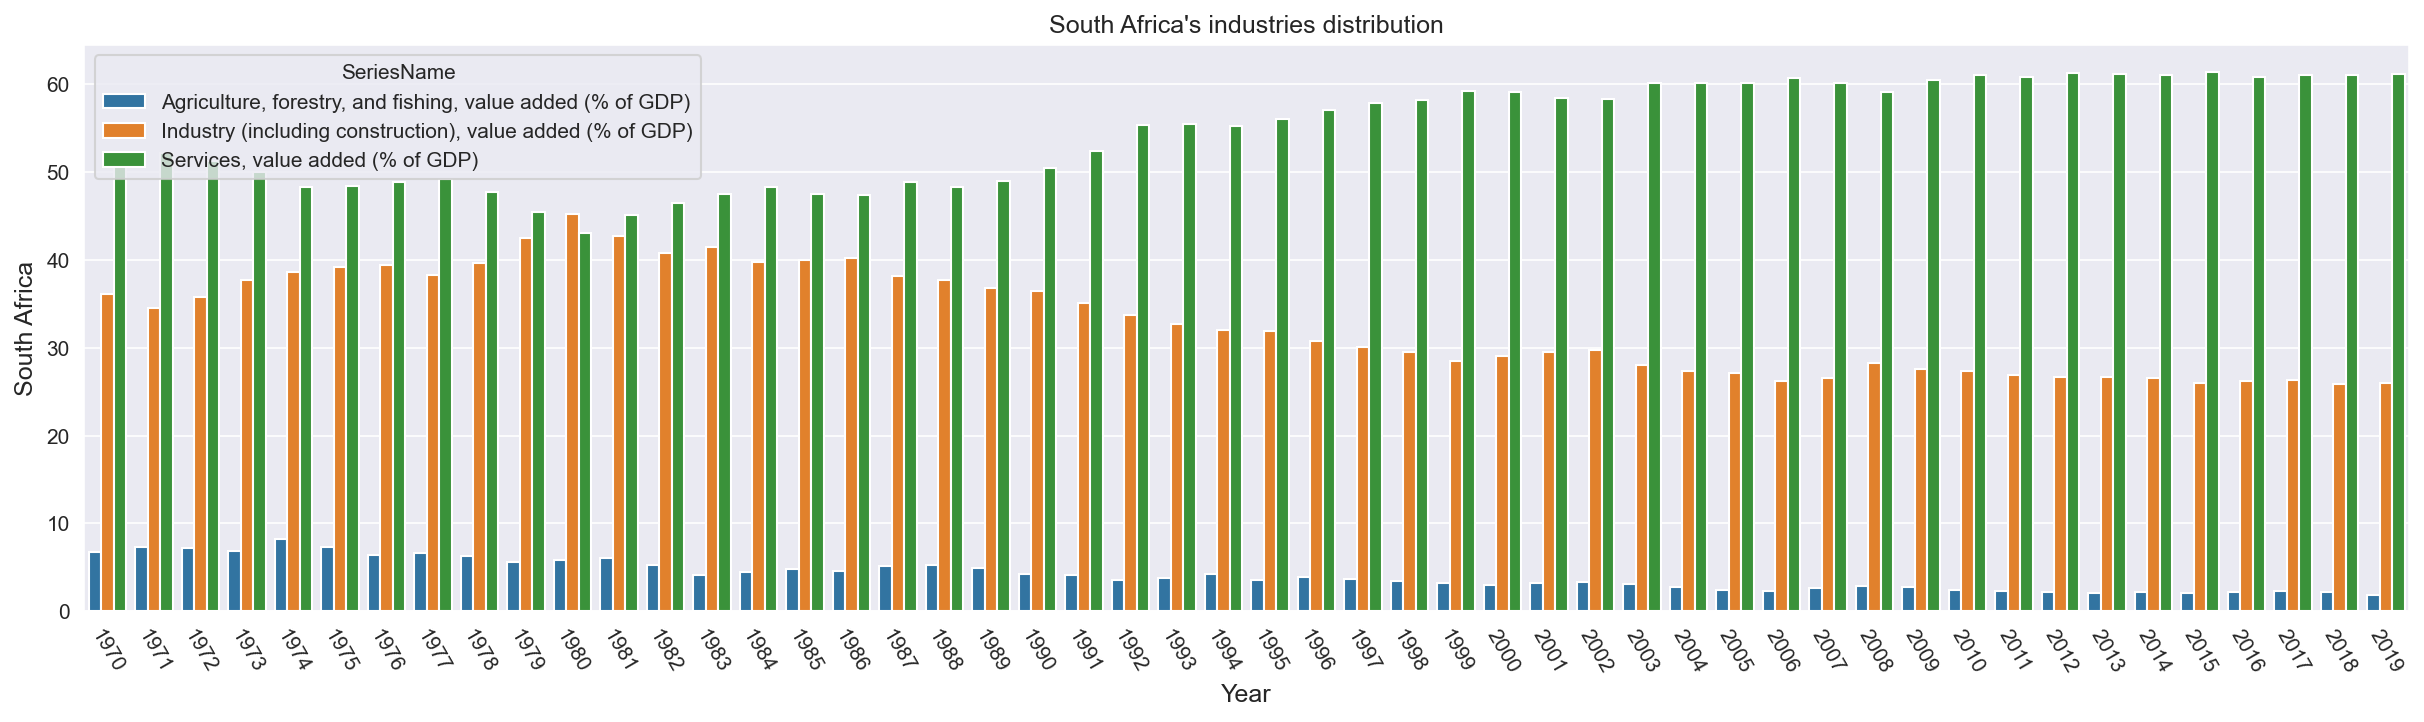

In [22]:
fig , ax5 = plt.subplots(1,1,figsize = (20,5)) 
plot_func(ax5,12,"South Africa")

In [23]:
economy_data.stack(level=0).reset_index()

SeriesName,Year,CountryName,"Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (current US$),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)"
0,2019.0,Brazil,4.436545,2.634979e+11,1.839758e+12,1.136586,8717.186278,2.696019e+11,17.922226,63.252920
1,2019.0,China,7.111634,2.641273e+12,1.434290e+13,6.108561,10261.679128,2.476287e+12,38.972540,53.915826
2,2019.0,India,15.964598,5.365582e+11,2.875142e+12,5.023873,2104.145900,6.140317e+11,24.881008,49.877495
3,2019.0,Russian Federation,3.448292,4.812868e+11,1.699877e+12,1.341875,11584.995383,3.529118e+11,32.166303,54.026397
4,2019.0,South Africa,1.884542,1.049158e+11,3.514316e+11,0.152583,6001.400814,1.031476e+11,25.999222,61.204745
...,...,...,...,...,...,...,...,...,...,...
227,1971.0,South Africa,7.336863,4.325960e+09,2.033369e+10,4.278970,897.129856,5.155079e+09,34.566458,52.155676
228,1970.0,Brazil,10.373620,2.975392e+09,4.232760e+10,8.769947,445.023101,3.153304e+09,32.183694,41.471836
229,1970.0,China,34.798438,2.307255e+09,9.260297e+10,19.300000,113.162992,2.278820e+09,40.272843,24.928719
230,1970.0,India,39.927806,2.361333e+09,6.242248e+10,5.157230,112.434493,2.421333e+09,21.729309,35.046871


## Import and export 



In [24]:
imp_exp = economy_data.stack(level=0).reset_index()
imp_exp = imp_exp[['Year','CountryName','Imports of goods and services (current US$)','Exports of goods and services (current US$)']]
imp_exp.loc[: ,'Year'] = pd.to_datetime(imp_exp['Year'],format = '%Y').dt.year
imp_exp.fillna(method='ffill',inplace=True)
imp_exp.head()

SeriesName,Year,CountryName,Imports of goods and services (current US$),Exports of goods and services (current US$)
0,2019,Brazil,2.696019e+11,2.634979e+11
1,2019,China,2.476287e+12,2.641273e+12
2,2019,India,6.140317e+11,5.365582e+11
3,2019,Russian Federation,3.529118e+11,4.812868e+11
4,2019,South Africa,1.031476e+11,1.049158e+11


In [25]:
def line_45(x_value,y_value):
    x = np.array([0,x_value])
    y = np.array([0,y_value])
    d = {'x':x,'y':y}
    df = pd.DataFrame(d)
    sns.lineplot(x = "x",y = "y",data = df, linewidth = 0.5)

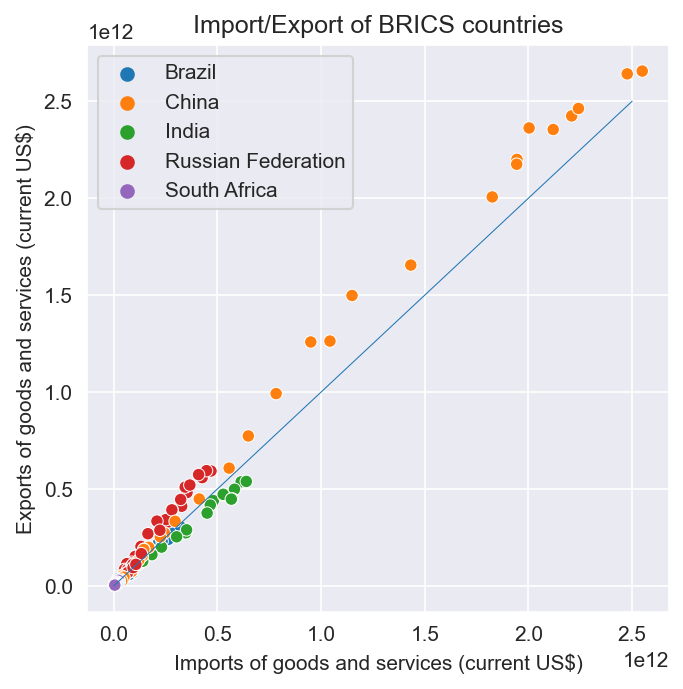

In [26]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(x = "Imports of goods and services (current US$)",y="Exports of goods and services (current US$)",
                data = imp_exp,hue = "CountryName")
ax.set_title("Import/Export of BRICS countries")
line_45(2.5*1e12,2.5*1e12)

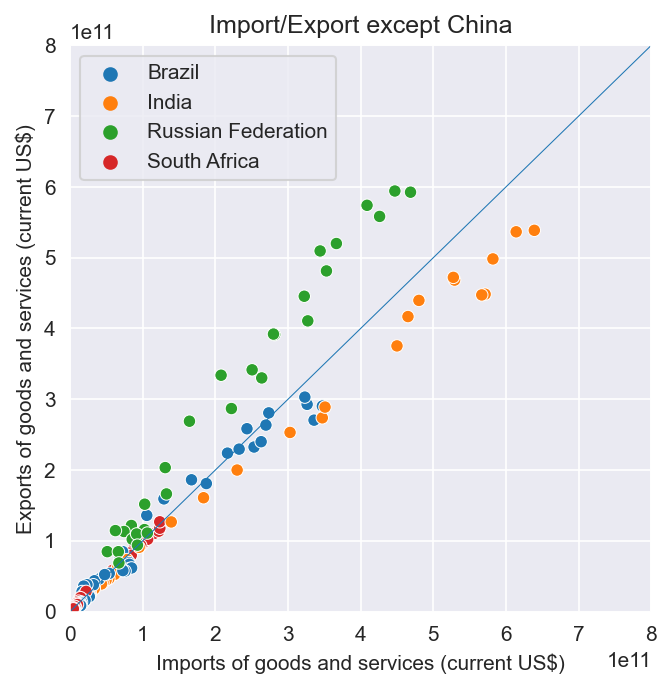

In [27]:
imp_exp_without_china = imp_exp[imp_exp['CountryName']!='China']
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(x = "Imports of goods and services (current US$)",y="Exports of goods and services (current US$)",
                data = imp_exp_without_china,hue = "CountryName")
ax.set_ylim(0,0.8*1e12)
ax.set_xlim(0,0.8*1e12)
ax.set_title("Import/Export except China")
line_45(2.5*1e12,2.5*1e12)


# Education and environment

In [28]:
# sns.jointplot with GDP growth

In [29]:
edu_env = pd.read_csv('data/EducationAndEnviron_Data.csv', delimiter = ";")
edu_env.head() 

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN


In [30]:
# eco = edu_env.groupby(by = 'SeriesName')
# name_list = list(eco.groups.keys())
# name_list

In [31]:
attrib = ['Access to electricity (% of population)',
          'Urban population (% of total population)',
          'Rural population (% of total population)',
            'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)',
 'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)',
 "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
 "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
 "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)",
 "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)"   
         ]

In [32]:
edu_env_data = edu_env[edu_env['SeriesName'].isin(attrib)]
edu_env_data = edu_env_data.set_index(['Year','SeriesName','CountryName'])['Value'].unstack().unstack()
# if not tell which level to unstack, default: the very right index column 
# economy_data.fillna(method = 'ffill') # fill with previous values
edu_env_data.sort_values(by ='Year',inplace = True, ascending = False)
edu_env_data.head()

CountryName                                  Brazil  \
SeriesName  Access to electricity (% of population)   
Year                                                  
2019.0                                          NaN   
2018.0                                   100.000000   
2017.0                                   100.000000   
2016.0                                    99.700000   
2015.0                                    99.710902   

CountryName                                                                                          \
SeriesName  Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)   
Year                                                                                                  
2019.0                                                     NaN                                        
2018.0                                                 0.20860                                        
2017.0                                                 0.17860                                        
2016.0                                                 0.17207                                        
2015.0                                                     NaN                                        

CountryName                                                                                        \
SeriesName  Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)   
Year                                                                                                
2019.0                                                     NaN                                      
2018.0                                                 0.31359                                      
2017.0                                                 0.26134                                      
2016.0                                                 0.24092                                      
2015.0                                                     NaN                                      

CountryName                                                                                                     \
SeriesName  Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)   
Year                                                                                                             
2019.0                                                     NaN                                                   
2018.0                                               18.292061                                                   
2017.0                                               17.540560                                                   
2016.0                                               16.919279                                                   
2015.0                                                     NaN                                                   

CountryName                                                                                                   \
SeriesName  Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)   
Year                                                                                                           
2019.0                                                     NaN                                                 
2018.0                                                14.54734                                                 
2017.0                                                13.68589                                                 
2016.0                                                13.56130                                                 
2015.0                                                     NaN                                                 

CountryName                                                                                                   \
Ser

In [33]:
edu_data = edu_env_data.stack().reset_index()
edu_data.loc[: ,'Year'] = pd.to_datetime(edu_data['Year'],format = '%Y').dt.year
edu_data_brazil_2018 = edu_data[edu_data['Year']==2018][['SeriesName','Brazil']].reset_index()
edu_data_brazil_2018 = edu_data_brazil_2018.loc[1:6]
edu_data_brazil_2018

CountryName,index,SeriesName,Brazil
1,3,"Educational attainment, Doctoral or equivalent...",0.208600
2,4,"Educational attainment, Doctoral or equivalent...",0.313590
3,5,"Educational attainment, at least Bachelor's or...",18.292061
4,6,"Educational attainment, at least Bachelor's or...",14.547340
5,7,"Educational attainment, at least Master's or e...",0.900460
6,8,"Educational attainment, at least Master's or e...",1.023570


In [34]:
edu_data_brazil_2018['SeriesName'] = ['doc_f','doc_m','bac_f','bac_m','mas_f','mas_m']
edu_data_brazil_2018

CountryName,index,SeriesName,Brazil
1,3,doc_f,0.208600
2,4,doc_m,0.313590
3,5,bac_f,18.292061
4,6,bac_m,14.547340
5,7,mas_f,0.900460
6,8,mas_m,1.023570


Text(0.5, 1.0, 'Higher Education of Brazil in 2018')

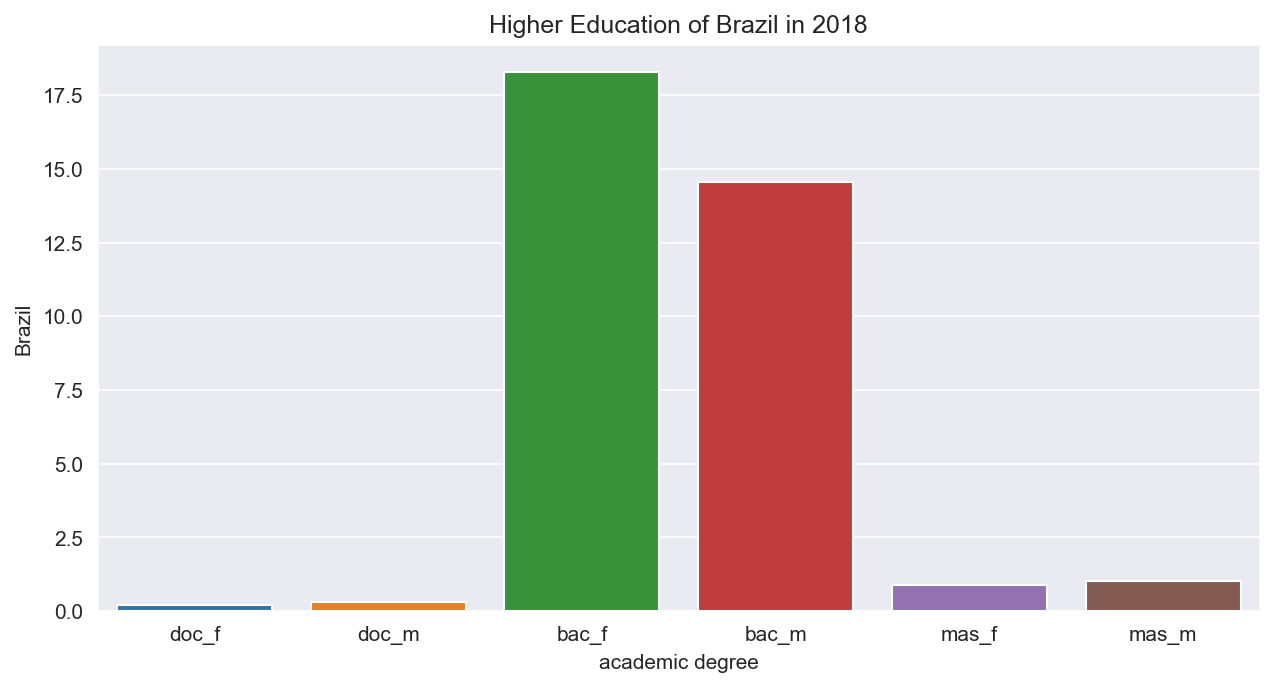

In [35]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.barplot(x="SeriesName",y="Brazil",data = edu_data_brazil_2018, ci = False)
plt.xlabel("academic degree")
plt.title("Higher Education of Brazil in 2018")

# Healthy and poverty

In [36]:
health_pov = pd.read_csv('data/HealthAndPoverty_Data.csv', delimiter = ";")
health_pov.head() 

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106


In [37]:
eco = health_pov.groupby(by = 'SeriesName')
name_list = list(eco.groups.keys())
len(name_list)

279

In [38]:
attri = [
    'Population growth (annual %)',
    'Hospital beds (per 1,000 people)',
    'Life expectancy at birth, total (years)',
]

In [39]:
health_pov_data = health_pov[health_pov['SeriesName'].isin(attri)]
health_pov_data = health_pov_data.set_index(['Year','SeriesName','CountryName'])['Value'].unstack().unstack()
# if not tell which level to unstack, default: the very right index column 
# economy_data.fillna(method = 'ffill') # fill with previous values
health_pov_data.sort_values(by ='Year',inplace = False, ascending = True)
health_pov_data.head()

CountryName                           Brazil  \
SeriesName  Hospital beds (per 1,000 people)   
Year                                           
1970.0                                3.6918   
1971.0                                   NaN   
1972.0                                   NaN   
1973.0                                   NaN   
1974.0                                   NaN   

CountryName                                          \
SeriesName  Life expectancy at birth, total (years)   
Year                                                  
1970.0                                       58.911   
1971.0                                       59.332   
1972.0                                       59.739   
1973.0                                       60.132   
1974.0                                       60.513   

CountryName                                                         China  \
SeriesName  Population growth (annual %) Hospital beds (per 1,000 people)   
Year                                                                        
1970.0                          2.519725                             1.54   
1971.0                          2.460874                             1.58   
1972.0                          2.408584                             1.71   
1973.0                          2.375064                             1.77   
1974.0                          2.364464                             1.85   

CountryName                                          \
SeriesName  Life expectancy at birth, total (years)   
Year                                                  
1970.0                                       59.085   
1971.0                                       60.303   
1972.0                                       61.344   
1973.0                                       62.281   
1974.0                                       63.134   

CountryName                                                         India  \
SeriesName  Population growth (annual %) Hospital beds (per 1,000 people)   
Year                                                                        
1970.0                          2.761676                           0.6045   
1971.0                          2.746916                              NaN   
1972.0                          2.457357                              NaN   
1973.0                          2.283395                              NaN   
1974.0                          2.065955                              NaN   

CountryName                                          \
SeriesName  Life expectancy at birth, total (years)   
Year                                                  
1970.0                                       47.737   
1971.0                                       48.398   
1972.0                                       49.061   
1973.0                                       49.722   
1974.0                                       50.374   

CountryName                                            Russian Federation  \
SeriesName  Population growth (annual %) Hospital beds (per 1,000 people)   
Year                                                                        
1970.0                          2.204540                              NaN   
1971.0                          2.257901                              NaN   
1972.0                          2.301190                              NaN   
1973.0                          2.327407                              NaN   
1974.0                          2.331908                              NaN   

CountryName                                          \
SeriesName  Life expectancy at birth, total (years)   
Year                                                  
1970.0                                    68.133659   
1971.0                                    68.376585   
1972.0                                    68.308537   
1973.0                                    68.294634   
1974.0                                    68.320244   



In [40]:
hp_data = health_pov_data.stack(level=0).reset_index()
hp_data.loc[: ,'Year'] = pd.to_datetime(hp_data['Year'],format = '%Y').dt.year
hp_data.head()

SeriesName,Year,CountryName,"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)",Population growth (annual %)
0,1970,Brazil,3.6918,58.911000,2.519725
1,1970,China,1.5400,59.085000,2.761676
2,1970,India,0.6045,47.737000,2.204540
3,1970,Russian Federation,NaN,68.133659,0.569083
4,1970,South Africa,NaN,52.620000,2.633871


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Population growth (annual %) distribution')

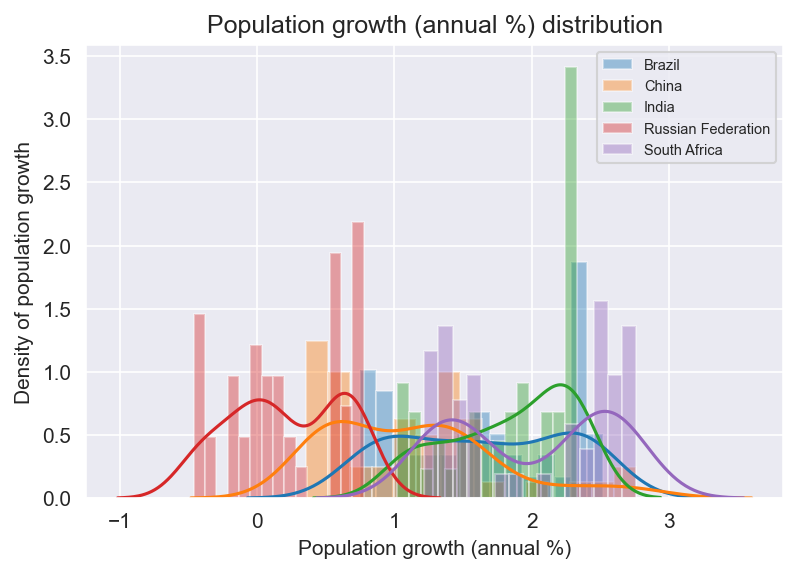

In [41]:
hp_pop_data = hp_data[['Year','CountryName','Population growth (annual %)']].reset_index()
for coun_name in list(hp_pop_data['CountryName'].unique()):
    ax = sns.distplot(hp_pop_data[hp_pop_data['CountryName']==coun_name]['Population growth (annual %)'],bins = 15,kde = True,label = coun_name)
    # ax = sns.kdeplot(hp_pop_data[hp_pop_data['CountryName']==coun_name]['Population growth (annual %)'],label = coun_name)
    ax.legend(fontsize = 7)
    #sns.distplot(hp_pop_data[hp_pop_data['CountryName']=='Brazil']['Population growth (annual %)'],bins = 15)
#plt.axvline(0.0, 0,2, c='r')
plt.ylabel("Density of population growth")
plt.title("Population growth (annual %) distribution")

Text(0.5, 1.0, 'Population growth percentage by Year')

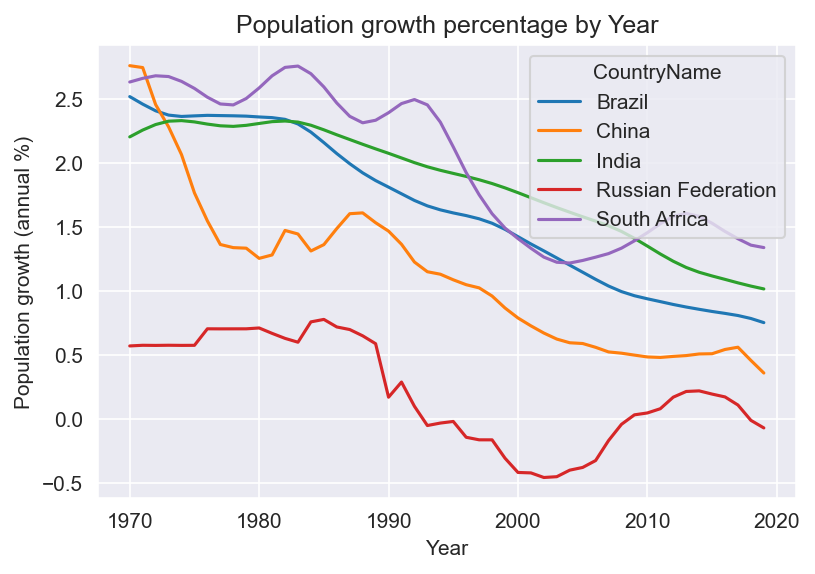

In [42]:
sns.lineplot(x="Year",y='Population growth (annual %)',data = hp_pop_data, hue = "CountryName")
plt.title('Population growth percentage by Year')

Text(0.5, 1.0, 'Life expectancy changes by year')

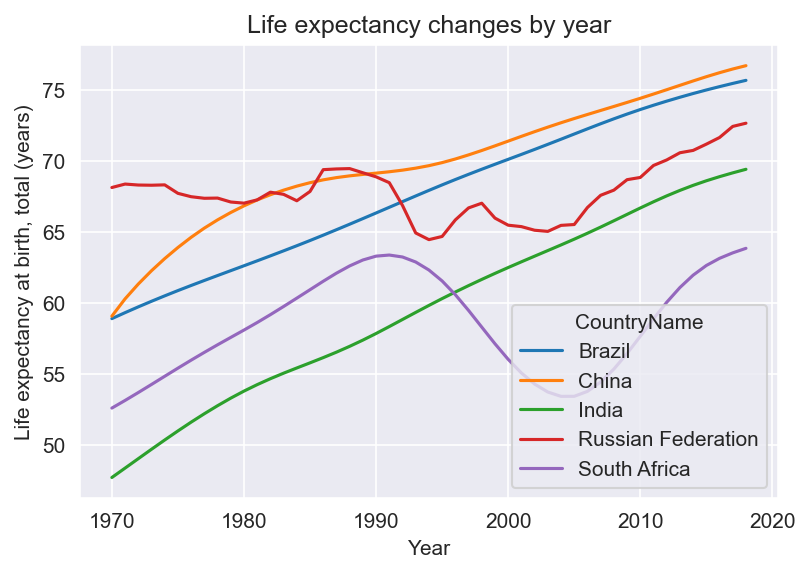

In [43]:
hp_data = hp_data[['Year','CountryName','Hospital beds (per 1,000 people)','Life expectancy at birth, total (years)']].reset_index()
sns.set_style("darkgrid")
sns.lineplot(x='Year',y='Life expectancy at birth, total (years)',data = hp_data,hue = 'CountryName')
plt.title("Life expectancy changes by year")

Text(0.5, 1.0, 'Hospital beds')

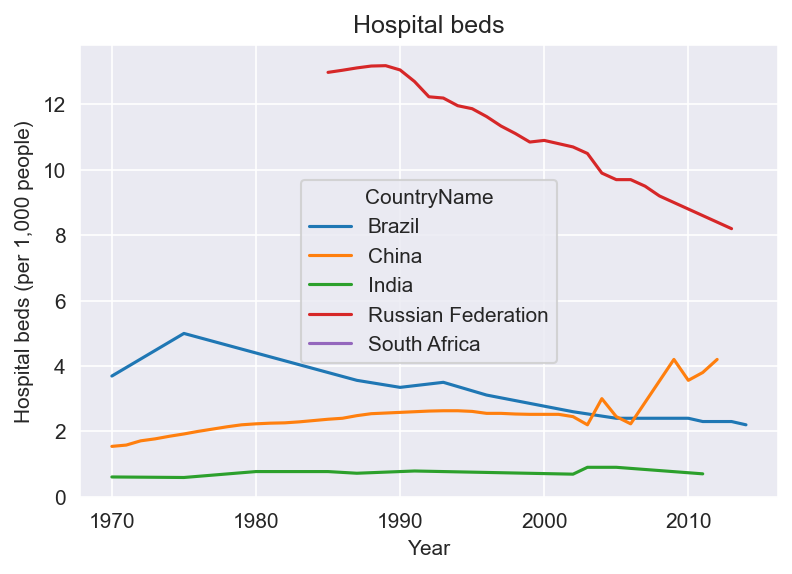

In [44]:
sns.lineplot(x='Year',y='Hospital beds (per 1,000 people)',data = hp_data,hue = 'CountryName')
plt.title("Hospital beds")

Text(0.5, 1.0, 'Relation between Life Expectancy and Hospital Beds of China')

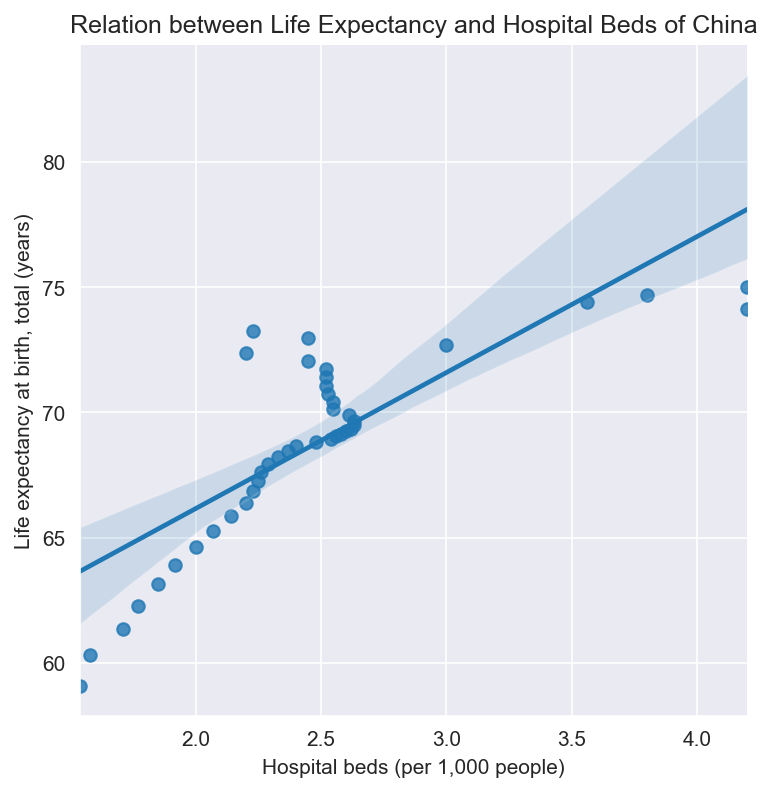

In [52]:
hp_data_with_china = hp_data[hp_data['CountryName']=='China']
sns.lmplot(x='Hospital beds (per 1,000 people)',y='Life expectancy at birth, total (years)',
                data = hp_data_with_china)
plt.title("Relation between Life Expectancy and Hospital Beds of China")
#line_45(2,55)